In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore") # to ignore warnings

In [2]:
data = pd.read_csv('data/Telco-Customer-Churn.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
data.drop(columns=['customerID'], inplace=True)

In [6]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [7]:
data.describe(include='object')

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,6531,2
top,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,,No
freq,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,11,5174


In [8]:
data.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [9]:
categorical_cols = data.select_dtypes(include=['object']).columns.tolist()
numerical_cols = data.select_dtypes(include=['number']).columns.tolist()

In [10]:
for col in categorical_cols:
    print(col, data[col].unique())

gender ['Female' 'Male']
Partner ['Yes' 'No']
Dependents ['No' 'Yes']
PhoneService ['No' 'Yes']
MultipleLines ['No phone service' 'No' 'Yes']
InternetService ['DSL' 'Fiber optic' 'No']
OnlineSecurity ['No' 'Yes' 'No internet service']
OnlineBackup ['Yes' 'No' 'No internet service']
DeviceProtection ['No' 'Yes' 'No internet service']
TechSupport ['No' 'Yes' 'No internet service']
StreamingTV ['No' 'Yes' 'No internet service']
StreamingMovies ['No' 'Yes' 'No internet service']
Contract ['Month-to-month' 'One year' 'Two year']
PaperlessBilling ['Yes' 'No']
PaymentMethod ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
TotalCharges ['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']
Churn ['No' 'Yes']


In [11]:
### Investigating why TotalCharges is not numeric
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

In [12]:
data['TotalCharges'].isnull().sum()

np.int64(11)

In [13]:
data[data['TotalCharges'].isnull()==True][['tenure','MonthlyCharges','TotalCharges']]

,tenure,MonthlyCharges,TotalCharges
488,0,52.55,NaN
753,0,20.25,NaN
936,0,80.85,NaN
1082,0,25.75,NaN
1340,0,56.05,NaN
3331,0,19.85,NaN
3826,0,25.35,NaN
4380,0,20.00,NaN
5218,0,19.70,NaN
6670,0,73.35,NaN


In [14]:
data[data['TotalCharges'].isnull()==False][['tenure','MonthlyCharges','TotalCharges']].head(10)

,tenure,MonthlyCharges,TotalCharges
0,1,29.85,29.85
1,34,56.95,1889.50
2,2,53.85,108.15
3,45,42.30,1840.75
4,2,70.70,151.65
5,8,99.65,820.50
6,22,89.10,1949.40
7,10,29.75,301.90
8,28,104.80,3046.05
9,62,56.15,3487.95


Total Charges  = Tenure * Monthly Charges , After coercing to numeric, the NaN values in TotalCharges can be filled with the product of tenure and MonthlyCharges. 
- But the tenure column is 0. Since the tenure is 0, it means that these customers have not been with the company long enough to incur any charges, hence TotalCharges is NaN.
- We can fill these NaN values with 0, as they represent customers who have not been charged anything yet.

In [15]:
data['TotalCharges'].fillna(0, inplace=True)

In [16]:
## Remapping categorical variables and numerical variables
categorical_cols = data.select_dtypes(include=['object']).columns.tolist()
numerical_cols = data.select_dtypes(include=['number']).columns.tolist()

In [17]:
numerical_cols

['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']

In [18]:
data['SeniorCitizen'].unique()

## senior citizen is a binary variable

array([0, 1])

In [19]:
for col in categorical_cols:
    print(col, data[col].unique())

gender ['Female' 'Male']
Partner ['Yes' 'No']
Dependents ['No' 'Yes']
PhoneService ['No' 'Yes']
MultipleLines ['No phone service' 'No' 'Yes']
InternetService ['DSL' 'Fiber optic' 'No']
OnlineSecurity ['No' 'Yes' 'No internet service']
OnlineBackup ['Yes' 'No' 'No internet service']
DeviceProtection ['No' 'Yes' 'No internet service']
TechSupport ['No' 'Yes' 'No internet service']
StreamingTV ['No' 'Yes' 'No internet service']
StreamingMovies ['No' 'Yes' 'No internet service']
Contract ['Month-to-month' 'One year' 'Two year']
PaperlessBilling ['Yes' 'No']
PaymentMethod ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn ['No' 'Yes']


- Map Yes/ No to 1/0
- To handle the columns with [yes, no, No internet service]
    - assume No internet service means no backup, support etc is needed. Combine with No and map to 1/0
    - if you suspect different behaviors for No and No internet service, you can perform one hot encoding.

In [20]:
for col in ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']:
    data[col] = data[col].map({'Yes': 1, 'No': 0})

Using One Hot Encoding techniques to convert the remaining categorical columns

In [21]:

for col in ['gender','MultipleLines', 'InternetService', 'OnlineSecurity', 
            'OnlineBackup', 'DeviceProtection', 'TechSupport', 
            'StreamingTV', 'StreamingMovies','Contract','PaymentMethod' ]:
    dummies = pd.get_dummies(data[col], prefix=col, drop_first=False).astype(int)
    data = pd.concat([data, dummies], axis=1)
    data.drop(columns=[col], inplace=True)
    

In [22]:
data.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,gender_Female,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,0,1,0,1,29.85,29.85,0,1,...,1,0,0,1,0,0,0,0,1,0
1,0,0,0,34,1,0,56.95,1889.50,0,0,...,1,0,0,0,1,0,0,0,0,1
2,0,0,0,2,1,1,53.85,108.15,1,0,...,1,0,0,1,0,0,0,0,0,1
3,0,0,0,45,0,0,42.30,1840.75,0,0,...,1,0,0,0,1,0,1,0,0,0
4,0,0,0,2,1,1,70.70,151.65,1,1,...,1,0,0,1,0,0,0,0,1,0


## EDA


Text(0.5, 1.0, '% of Senior Citizens')

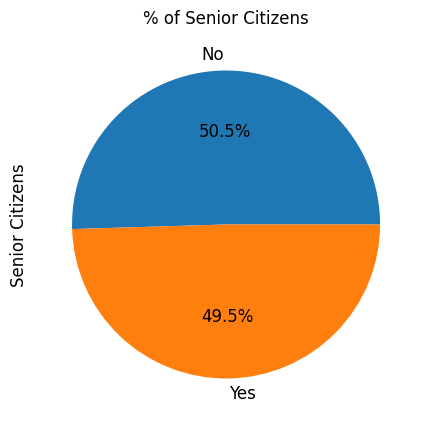

In [23]:
ax = (data['gender_Female'].value_counts()*100.0 /len(data))\
.plot.pie(autopct='%.1f%%', labels = ['No', 'Yes'],figsize =(5,5), fontsize = 12 )                                                                           
ax.set_ylabel('Senior Citizens',fontsize = 12)
ax.set_title('% of Senior Citizens', fontsize = 12)

Text(0.5, 1.0, '% of Senior Citizens')

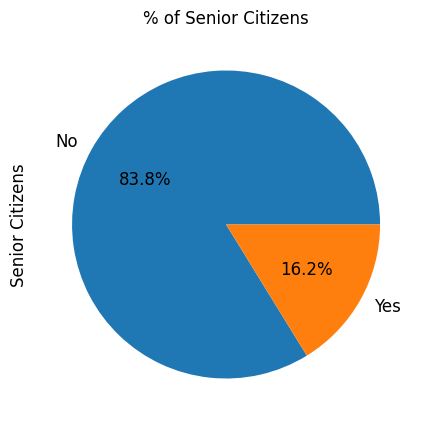

In [24]:
ax = (data['SeniorCitizen'].value_counts()*100.0 /len(data))\
.plot.pie(autopct='%.1f%%', labels = ['No', 'Yes'],figsize =(5,5), fontsize = 12 )                                                                           
ax.set_ylabel('Senior Citizens',fontsize = 12)
ax.set_title('% of Senior Citizens', fontsize = 12)

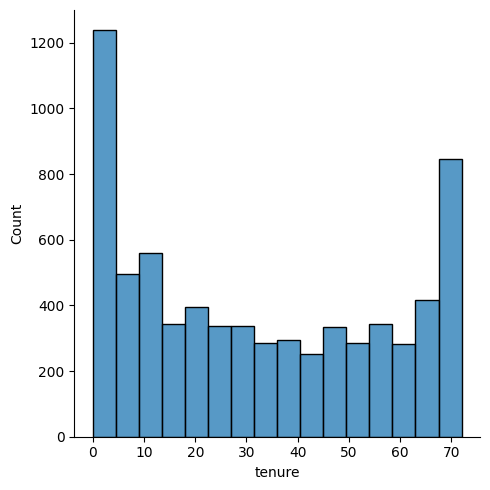

In [25]:
## Invetigating if 72 years of tenure is an outlier
sns.displot(data['tenure'])

## Modeling




In [31]:

from sklearn.model_selection import train_test_split, cross_val_score,GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, precision_recall_curve, precision_score, recall_score,f1_score,roc_auc_score, confusion_matrix,classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline


In [27]:
X = data.drop(columns='Churn', axis=1)
y = data['Churn']

In [33]:
X_train, X_test, y_train,y_test =  train_test_split(X,y,test_size=0.3,random_state=101)


In [ ]:
models = {
    'RandomForest' : RandomForestClassifier(random_state=42, n_jobs=-1),
    'GradientBoosting': GradientBoostingClassifier(random_state=42),
    'XGBClassifier': XGBClassifier(random_state = 42, use_label_encoder = False, eval_metric = 'logloss'),
    'LGBMClassifier': LGBMClassifier(random_state=42, n_jobs=-1)
}

results= {}

for name,model in models.items():
    print(f"Training {name} ....")

    # create pipeline with preprocessing , SMote 
    pipeline =  ImbPipeline(steps=[
        ('smote',SMOTE(random_state=42)),
        ('classifier',model)
    ])

    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    y_proba = pipeline.predict_proba(X_test)[:,-1] # probability of positive class i.e. churn

    accuracy = accuracy_score(y_pred=y_pred, y_true=y_test)
    precision = precision_score(y_pred=y_pred, y_true=y_test)
    recall = recall_score(y_pred=y_pred, y_true=y_test)
    f1 = f1_score(y_pred=y_pred, y_true=y_test)
    roc_auc = roc_auc_score(y_test, y_proba)


    results[name] = {
    'Accuracy' : accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1-score': f1,
    'ROC-AUC': roc_auc,
    'Confusion Matrix': confusion_matrix(y_pred=y_pred, y_true=y_test),
    'classification_report': classification_report(y_pred=y_pred, y_true=y_test)
    }

    print(f"{name} Performance")
    print(f"  accuracy: {accuracy:.4f}")
    print(f"  precision: {precision:.4f}")
    print(f"  recall: {recall:.4f}")
    print(f"  F1-score: {f1:.4f}")
    print(f"  ROC-AUC score: {roc_auc:.4f}")
    print(f"  Confusion Matrix: ",results[name]['Confusion Matrix'])
    print(f"  Classification Report: ",results[name]['classification_report'])




Training RandomForest ....
RandomForest Performance
  accuracy: 0.7733
  precision: 0.5898
  recall: 0.5097
  F1-score: 0.5468
  ROC-AUC score: 0.8097
  Confusion Matrix:  [[1345  201]
 [ 278  289]]
  Classification Report:                precision    recall  f1-score   support

           0       0.83      0.87      0.85      1546
           1       0.59      0.51      0.55       567

    accuracy                           0.77      2113
   macro avg       0.71      0.69      0.70      2113
weighted avg       0.76      0.77      0.77      2113

Training GradientBoosting ....
GradientBoosting Performance
  accuracy: 0.7937
  precision: 0.6189
  recall: 0.6014
  F1-score: 0.6100
  ROC-AUC score: 0.8433
  Confusion Matrix:  [[1336  210]
 [ 226  341]]
  Classification Report:                precision    recall  f1-score   support

           0       0.86      0.86      0.86      1546
           1       0.62      0.60      0.61       567

    accuracy                           0.79      21